## The Dataset Used here can be found on http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf
import warnings
warnings. filterwarnings('ignore')

C:\Users\bilal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
A=pd.read_csv('Concrete_Data.csv')
A.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [3]:
A.columns=['CC','BFS','FA','WC','SPC','CA','FAC','Age','CCS']
A.columns

Index(['CC', 'BFS', 'FA', 'WC', 'SPC', 'CA', 'FAC', 'Age', 'CCS'], dtype='object')

In [4]:
A.shape

(1030, 9)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1030 non-null   float64
 1   BFS     1030 non-null   float64
 2   FA      1030 non-null   float64
 3   WC      1030 non-null   float64
 4   SPC     1030 non-null   float64
 5   CA      1030 non-null   float64
 6   FAC     1030 non-null   float64
 7   Age     1030 non-null   int64  
 8   CCS     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
A.describe()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Pairplot

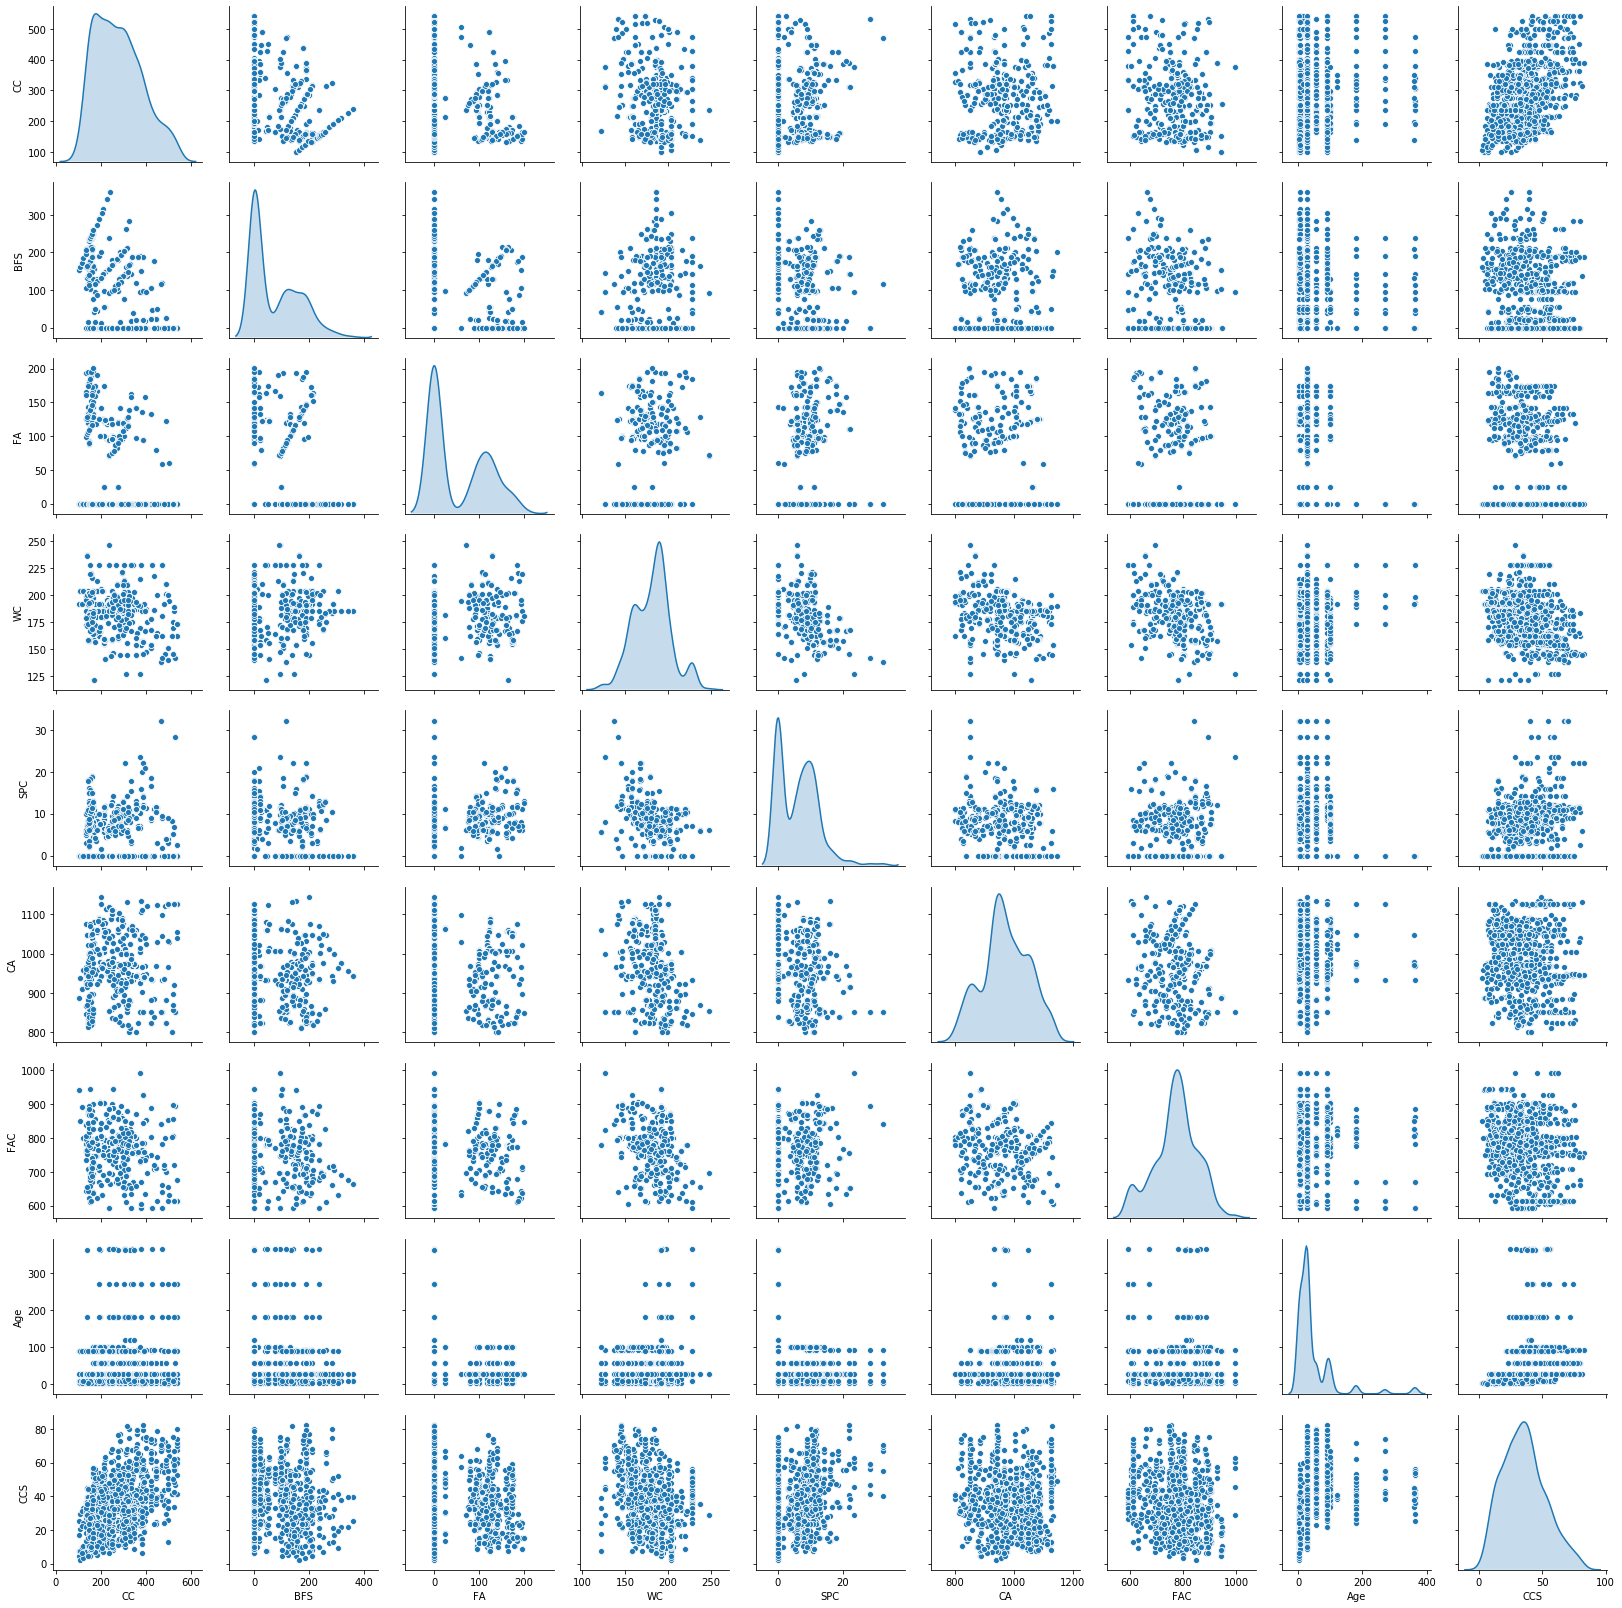

In [7]:
sns.pairplot(A,diag_kind='kde')
plt.show()

In [8]:
A.corr()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
CC,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WC,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SPC,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### Here by the pairplot and the correlation matrix, we can tell that most of the variables have less correlation with CCS(Concrete Compressive Strength)

## Checking the significance of the variables

In [9]:
from scipy.stats import levene
for i in A.columns[:-1]:
    print(i)
    print(levene(A[i],A['CCS']))
   

CC
LeveneResult(statistic=1525.5200415434292, pvalue=3.808814475843217e-250)
BFS
LeveneResult(statistic=716.5702375124835, pvalue=1.0602702086604272e-135)
FA
LeveneResult(statistic=407.83846547932365, pvalue=6.895004041513094e-83)
WC
LeveneResult(statistic=40.22743987340414, pvalue=2.7710396977949434e-10)
SPC
LeveneResult(statistic=665.5861096172965, pvalue=2.1162500220923255e-127)
CA
LeveneResult(statistic=1102.664217424037, pvalue=5.4549852696796274e-194)
FAC
LeveneResult(statistic=863.8825862792261, pvalue=7.543516221960523e-159)
Age
LeveneResult(statistic=93.5951899025091, pvalue=1.1118984098565435e-21)


### Here we can see that all the variables are significantly significant

In [10]:
X=A.drop('CCS',axis=1)
y=A['CCS']

In [11]:
X.shape

(1030, 8)

### Scaling the Data

In [12]:
sc=StandardScaler()
X_std=sc.fit_transform(X)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor



## Getting the best parameters for the models using GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

### Best parameters for KNN

In [15]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}
GS=GridSearchCV(knn,knn_params,cv=5,scoring='neg_mean_squared_error')
GS.fit(X_std,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [16]:
GS.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

### Best Parameters for Decision Tree

In [17]:
dt=DecisionTreeRegressor(random_state=0)
dt_params={'max_depth':np.arange(1,50),'min_samples_leaf':np.arange(2,15)}
GS_dt=GridSearchCV(dt,dt_params,cv=5,scoring='neg_mean_squared_error')
GS_dt.fit(X_std,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_mean_squared_error')

In [18]:
GS_dt.best_params_ 

{'max_depth': 11, 'min_samples_leaf': 4}

### The best Params for Random Forest and Bagging models are found manually as GridSearch CV gives the result on the basis of highest neg_mean_squared_error while we want to find the best model based on variance

### Finding best value of n_estimator for Random Forest

In [19]:
RF_var = []
for val in np.arange(1,50):
    RF = RandomForestRegressor(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(RF,X_std,y,cv=kfold,scoring='neg_mean_squared_error')
    RF_var.append(np.var(cv_results,ddof=1))
print('We get the lowest variance error for n_estimators =',np.argmin(RF_var)+1)


We get the lowest variance error for n_estimators = 2


### Finding best value of n_estimator for Bagging model 

In [20]:
Bag_var = []
for val in np.arange(1,100):
    Bag = BaggingRegressor(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(Bag,X_std,y,cv=kfold,scoring='neg_mean_squared_error')
    Bag_var.append(np.var(cv_results,ddof=1))
print('We get the lowest variance error for n_estimators =',np.argmin(Bag_var)+1)


We get the lowest variance error for n_estimators = 2


### Finding best value of n_estimator for AdaBoost model 

In [21]:
Ad = AdaBoostRegressor(random_state=0)
Ad_params={'n_estimators':np.arange(1,300)}
GS_Ad=GridSearchCV(Ad,Ad_params,cv=5,scoring='neg_mean_squared_error')
GS_Ad.fit(X_std,y)



GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88...
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 28

In [22]:
GS_Ad.best_params_

{'n_estimators': 46}

### Finding best value of n_estimator for GradientBoost model 


In [23]:
Gb = GradientBoostingRegressor(random_state=0)
Gb_params={'n_estimators':np.arange(1,500)}
GS_Gb=GridSearchCV(Gb,Gb_params,cv=5,scoring='neg_mean_squared_error')
GS_Gb.fit(X_std,y)



GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,...
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490

In [24]:
GS_Gb.best_params_

{'n_estimators': 197}

In [25]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=8,weights='distance')
DT=DecisionTreeRegressor(max_depth=11,min_samples_leaf=4,random_state=0)
RF=RandomForestRegressor(n_estimators=2,random_state=0)
Bag = BaggingRegressor(n_estimators=2,random_state=0)
AB=AdaBoostRegressor(n_estimators=46,random_state=0)
GBoost=GradientBoostingRegressor(n_estimators=197)
#stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])


In [26]:
models = []
models.append(('MVLR', LR))
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))
models.append(('BaggingRegressor',Bag))
models.append(('AdaBoost',AB))
models.append(('GradientBoostRegressor',GBoost))
#models.append(('VotingRegressor',stacked))



MVLR: 10.468423 (0.641183)
KNNRegressor: 7.987861 (0.341762)
DT_Regressor: 6.902026 (0.405928)
RF_Regressor: 6.431601 (0.575153)
BaggingRegressor: 6.388058 (0.628092)
AdaBoost: 7.713340 (0.321982)
GradientBoostRegressor: 4.645113 (0.330093)


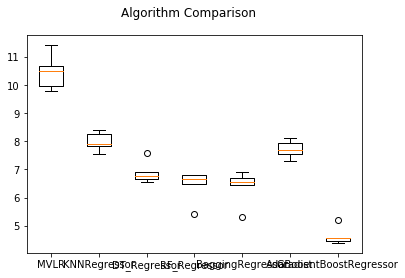

In [27]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, y,
	                                  cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results))) #for ploting purpose
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
	                       np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Here the best model that we have is Gradient Boost

### Let's see the performance of the Model now

In [28]:
X_std.shape

(1030, 8)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2,random_state=0)

In [43]:
GBoost=GradientBoostingRegressor(n_estimators=197)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=197)

In [44]:
print('The R-Squared for training is',GBoost.score(X_train,y_train))
print('The R-Squared for testing is',GBoost.score(X_test,y_test))


The R-Squared for training is 0.9689412419528459
The R-Squared for testing is 0.9202538129643866


In [45]:
y_pred = GBoost.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
print('The RMSE is',np.sqrt(mean_squared_error(y_pred,y_test)))

The RMSE is 4.582959987616619
